# Import Library

In [ ]:
import tensorflow as tf
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load Data

In [ ]:
img_rows, img_cols = 224, 224

data_path = "./Dataset/"

X, y = [], []

counter = 0

classes = os.listdir(data_path)

for class_path in os.listdir(data_path):
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        label = counter
        image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols), color_mode="grayscale")
        image = tf.keras.preprocessing.image.img_to_array(image)
        X.append(image)
        y.append(label)
    counter += 1

# from random import shuffle

# X = shuffle(X)
# y = shuffle(y)

X = np.array(X)
y = np.array(y)

In [ ]:
X = X.astype("float32") / 255.0

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
y_val = keras.utils.to_categorical(y_val, num_classes=4)

# Modelling

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(6, (5,5), activation="relu", input_shape=(img_rows, img_cols, 1)))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Conv2D(16, (5, 5), activation="relu"))
model.add(keras.layers.Conv2D(16, (5, 5), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))


In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# Training Modelling

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=120, validation_data=(X_val, y_val), epochs=10)

# Evaluation

In [24]:
score = model.evaluate(X_test, y_test)
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")

7/7 [==============================] - 1s 117ms/step - loss: 0.4434 - accuracy: 0.8700
Loss: 0.4433881342411041
Accuracy: 0.8700000047683716


# Predictions

In [25]:
predictions = model.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
predict_label = np.argmax(predictions, axis=1)

7/7 [==============================] - 2s 125ms/step


# Plotting

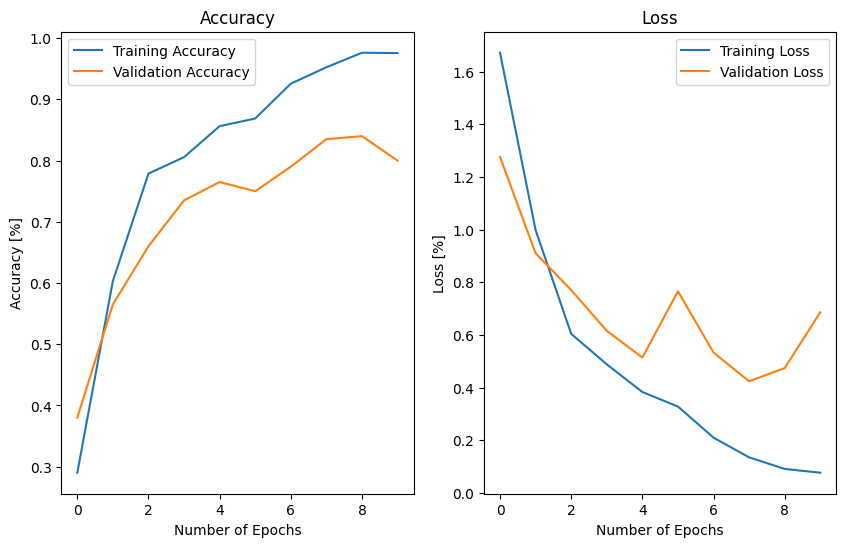

In [26]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy [%]")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss [%]")
plt.title("Loss")
plt.legend()